<a href="https://colab.research.google.com/github/Alejandrooct/AI-course/blob/main/AI_course_Day10(ultralytics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AI course

## Day#10: (Wednesday December 27, 2023)

##Assignement: Ultralitics - Yolo V8

Name: Alejandro Thamm

Instructions for exercise, in:

https://docs.google.com/document/d/1cp6kFpTdyTRKu_ehrrHtmDuKTxMjRRRe3LAJzIfhcyA/edit?usp=sharing


In [ ]:
# General outline of this project

# Step 0  - read (in full or summarized) the ultralitics python tutorial:
#           https://docs.ultralytics.com/usage/python/

# Step 1 - Dataset preparation and conditioning

# Step 1  - The dataset is provided in a shared folder, get familiar with it.
#           https://drive.google.com/drive/folders/1kc5v-5dJo678lw2oPBWJaFDdKMpt11DN
#           Since it is not possible to modify the yaml files in the shared folder
#           I will make a zip of the whole drone_yolo_data shared folder structure
#           I will place this zip file in my googledrive,
#           and uncompress it in the /content/ folder in the colab notebook.
# Setp 1A - Uncompress the dataset from MyDrive, into /content/
# Step 1B - explore the folder structure.
# Step 1C - plot a random image, showing the labled objects.
# Step 1D - Understand the yaml descriptive files and modify them to adapt to our use case.
# Step 1E - prepare a test folder

# Step 2  - YoloV8 training

# Step 2A - Install the ultralitics python library
# Step 2B - Import the neccesary libraries
#           Load a pretrained model (like the nano model (yolo8n.pt))
# Step 2C - Train the model (with for example 3, 10, 20, 30 epochs)
#           Each time save the trained models.
# Step 2D - Keep track of the training time, loss, and other relevant metrics
#           for each set of epochs.
#           After each training run you can inspect the “runs” folder created
#           by yolo in your /content folder
#           These folders have interesting images and metrics.
#           Try making sense of them, some are straight forward, some are not.

# Step 3  - Model Testing

#           Use the trained models from different epochs to make predictions
#           on the test set. (The test set needs to have labeled images)

# Step 4  - Evaluation and Analysis

#           Evaluate the performance of the trained models on the test set.
#           You can use metrics provided by ultralytics.
#           Compare the performance of models trained with varying epoch sizes.
#           Document your findings and analyze the impact of epoch size on model performance.


## Step 0 - read the ultralitics python tutorial:

In [ ]:
# Step 0 - tutorial document

# Upload the tutorial document to Claudse.ai, and read the summarized version:
# link to tutorial document:

#   https://docs.ultralytics.com/usage/python/


Here's a summary of the key points from the ultralytics Python usage page:

- Ultralytics is a popular open-source computer vision framework built on top of PyTorch. It offers state-of-the-art models for object detection and instance segmentation.

- To use ultralytics in Python, first install it via pip: `pip install ultralytics`

- Then import it: `import ultralytics`

- Ultralytics models can be constructed by passing a YAML configuration file. Example:

```
model = ultralytics.YOLOv8('yolov8n.yaml')
```

- Models have a `.train()` and `.val()` methods to train on data and validate.

- For inference, use the `.predict()` method and pass in a file path, URL image, NumPy array, torch tensor, etc. It returns the detection results.

- Results are parsed into a Pandas DataFrame for easy processing and visualization.

- Ultralytics integrates with many Python visualization libraries like Matplotlib, OpenCV, PIL/Image, etc to display results.

So in summary, ultralytics makes implementing state-of-the-art vision models simple and provides lots of convenience functions around training, validation, prediction and visualization.

In [ ]:
# Step 0A - compress the shared folder

# prompt for ChatGPT

# I am working in a colab notebook, in python.
# I want to compress a whole folder structure.
# the folder I want to compress, is placed in: '/content/drive/MyDrive/'
# the name of the folder I want to compress is: 'drone_yolo_data'
# I want the compressed file to be named: 'drone_yolo_data.zip'
# And I want the compressed folder to be saved in: '/content/'
# write some python code to do this for me.

In [ ]:
# Step 0A - compress the shared folder
# THIS HAS TO BE DONE ONLY ONCE)

import shutil

# Define the paths
source_folder = '/content/drive/MyDrive/drone_yolo_data'
zip_file_name = '/content/drone_yolo_data.zip'

# Compress the folder
#shutil.make_archive(zip_file_name.split('.zip')[0], 'zip', source_folder)

# Optionally, move the zip file to a different location
#shutil.move(zip_file_name.split('.zip')[0] + '.zip', zip_file_name)


## Step 1 - Dataset preparation and conditioning

In [ ]:
# Setp 1A - Uncompress the dataset from MyDrive, into /content/
#           Unzip the file from mounted googledrive into colab notebook.

import os
import zipfile

mounted_folder_path = '/content/drive/MyDrive/DD/data/AI-course/10-ultralitics'
zip_file            = 'drone_yolo_data.zip'
extract_path        = '/content/'

os.chdir(mounted_folder_path)

with zipfile.ZipFile(os.path.join(mounted_folder_path, zip_file), 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
# Step 1B - explore the folder structure.

# path for files in googledrive:
dataset_path       = '/content/drone_yolo_data'
dataset_train_path =   '/content/drone_yolo_data/train'
train_images_path  =     '/content/drone_yolo_data/train/images'
train_labels_path  =     '/content/drone_yolo_data/train/labels'
dataset_val_path   =   '/content/drone_yolo_data/val'
val_images_path    =     '/content/drone_yolo_data/val/images'
val_labels_path    =     '/content/drone_yolo_data/val/labels'
data_yaml_file     =   '/content/drone_yolo_data/data.yaml'
test_yaml_file     =   '/content/drone_yolo_data/test.yaml'

import os

# list of folders of interest
images_path_lst  = [train_images_path,
                    train_labels_path,
                    val_images_path,
                    val_labels_path ]

print ('^^^^^^^^^^^^^^^^^^^^')
print ('Folders of interest:')
for folder in images_path_lst:
  files_lst = os.listdir(folder)
  print ('Files in:', folder)
  print ('         ', len(files_lst))

print ('^^^^^^^^^^^^^^^^^^^^')


^^^^^^^^^^^^^^^^^^^^
Folders of interest:
Files in: /content/drone_yolo_data/train/images
          3256
Files in: /content/drone_yolo_data/train/labels
          3256
Files in: /content/drone_yolo_data/val/images
          814
Files in: /content/drone_yolo_data/val/labels
          814
^^^^^^^^^^^^^^^^^^^^


In [ ]:
# Step 1C - plot a random image, showing the labled objects.

# prompt for ChatGPT

# I am working in a colab notebook, in python.
# I am working with images, and machine learning.
# I have a folder with images:      image_folder = train_images_path
# I have a folder with yolo labels: label_folder = train_labels_path
# The yolo labels are text files, and for every image file there is a label file
# These labels are bounding boxes, and are defined by 5 numbers separated by spaces:
#   number#1: class
#   number#2: x_center (normalized to image width)
#   number#3: y_center (normalized to image height)
#   number#4: x_width (normalized to image width)
#   number#5: y_height (normalized to image height)
# Select a random image from the image folder and, plot side by side:
#   the original image on the left, and the same image with the yolo labels overlayed.
# please do the bounding box overlay using yellow color, and thin lines only 1 pixel in width.


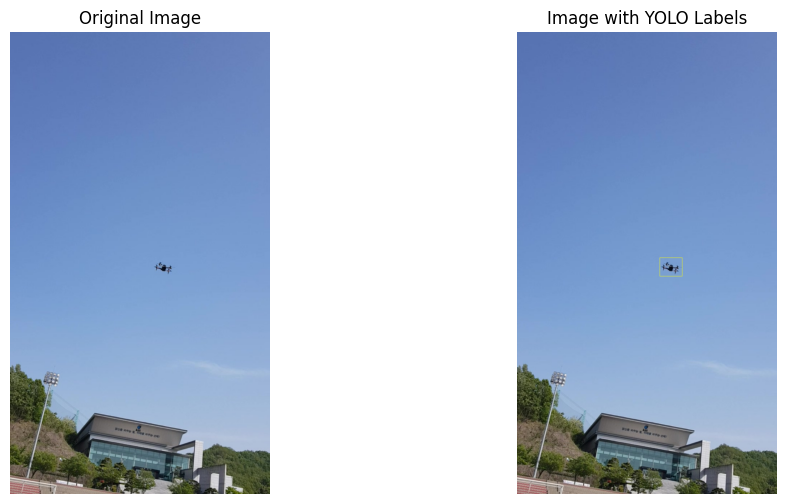

In [ ]:
# Step 1C - plot a random image, showing the labled objects.

import os
import random
import cv2
import matplotlib.pyplot as plt

# Set your image and label folder paths
image_folder = train_images_path
label_folder = train_labels_path

# Function to read YOLO labels from a file
def read_yolo_labels(label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()
    return [list(map(float, line.strip().split())) for line in lines]

# Function to draw bounding boxes on an image
def draw_boxes(image, boxes, color=(0, 255, 255), thickness=1):
    height, width, _ = image.shape
    for box in boxes:
        class_id, x_center, y_center, x_width, y_height = box
        x, y, w, h = (
            int((x_center - x_width / 2) * width),
            int((y_center - y_height / 2) * height),
            int(x_width * width),
            int(y_height * height),
        )
        cv2.rectangle(image, (x, y), (x + w, y + h), color, thickness)

# Get a random image file from the image folder
image_files = os.listdir(image_folder)
random_image_file = random.choice(image_files)
image_path = os.path.join(image_folder, random_image_file)

# Get the corresponding label file
label_file = os.path.splitext(random_image_file)[0] + ".txt"
label_path = os.path.join(label_folder, label_file)

# Read the image
image = cv2.imread(image_path)

# Read YOLO labels
yolo_labels = read_yolo_labels(label_path)

# Draw bounding boxes on the image
image_with_boxes = image.copy()
draw_boxes(image_with_boxes, yolo_labels)

# Plot the original image and the image with bounding boxes side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")

axes[1].imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
axes[1].set_title("Image with YOLO Labels")

for ax in axes:
    ax.axis("off")

plt.show()


In [ ]:
# Step 1D - Understand the yaml descriptive files and modify them to adapt to your use case.

# This link provides information about the Ultralitics yaml file format:
#  https://docs.ultralytics.com/datasets/detect/#ultralytics-yolo-format


In [ ]:
# during debugging
#         - make a backup of the yaml files
#           from /content/ to my MyDrive

source_path1 = '/content/drone_yolo_data/data.yaml'
dest_path1   = '/content/drive/MyDrive/DD/data/AI-course/10-ultralitics/data.yaml'

source_path2 = '/content/drone_yolo_data/test.yaml'
dest_path2   = '/content/drive/MyDrive/DD/data/AI-course/10-ultralitics/test.yaml'

import shutil

# Copy the file
#shutil.copyfile(source_path1, dest_path1)
#shutil.copyfile(source_path2, dest_path2)


'/content/drive/MyDrive/DD/data/AI-course/10-ultralitics/test.yaml'

In [ ]:
# Step  1. - Restore of the yaml files from MyDrive to /content/

source_path1 = '/content/drone_yolo_data/data.yaml'
dest_path1   = '/content/drive/MyDrive/DD/data/AI-course/10-ultralitics/data.yaml'

source_path2 = '/content/drone_yolo_data/test.yaml'
dest_path2   = '/content/drive/MyDrive/DD/data/AI-course/10-ultralitics/test.yaml'

import shutil

# Copy the file
shutil.copyfile(dest_path1, source_path1)
shutil.copyfile(dest_path2, source_path2)


'/content/drone_yolo_data/test.yaml'

In [1]:
# Step 1E - Prepare a test folder
#           place it in: '/content/drone_yolo_data/test'
#           Uncompress the test.zip from MyDrive, into /content/

import os
import zipfile

mounted_folder_path = '/content/drive/MyDrive/DD/data/AI-course/10-ultralitics'
zip_file            = 'test.zip'
extract_path        = '/content/drone_yolo_data/test'

os.chdir(mounted_folder_path)

with zipfile.ZipFile(os.path.join(mounted_folder_path, zip_file), 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
# Step 1E - explore the test folder structure.

# path for files in googledrive:
test_path       = '/content/drone_yolo_data/test'

import os

# list of folders of interest
images_path_lst  = [test_path]

print ('^^^^^^^^^^^^^^^^^^^^')
print ('Test Folder:')
for folder in images_path_lst:
  files_lst = os.listdir(folder)
  print ('Files in:', folder)
  print ('         ', len(files_lst))

print ('^^^^^^^^^^^^^^^^^^^^')


^^^^^^^^^^^^^^^^^^^^
Test Folder:
Files in: /content/drone_yolo_data/test
          47
^^^^^^^^^^^^^^^^^^^^


## Step 2 - YoloV8 training

The YOLOv8 model contains out-of-the-box support for object detection, classification, and segmentation tasks.

These are accessible through a Python package as well as a command line interface. Here we will use the python package.

In [3]:
# Step 2A - Install the ultralitics python library

!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 5.3 MB/s eta 0:00:00


In [4]:
# Step 2B - Import the ultralytics python library

import ultralytics
from ultralytics import YOLO

# show the version of ultralitics in use.
print(ultralytics.__version__)


8.0.232


In [ ]:
# Step 2. - loadina a pretrained model

# yolo offers 5 pretrained models:
#   yolov8n (nano)
#   yolov8s (small)
#   yolov8m (medium)
#   yolov8l (large)
#   yolov8x (extra large)
# these models have increasing mean average precison (mAP) and model size. see details in:
# https://hub.ultralytics.com/projects/YxEoA7JuqzuGp7N1U78n

# Load (download) a yolo version 8 pretrained model.
# model = YOLO('yolov8n.pt')


In [ ]:
# Step 2C - Load and Train the model for different number of epochs (3, 10, 20, 30)
#           Each time save the trained models

# Yolo documentation for the ultralytics.model.train arguments
# https://docs.ultralytics.com/modes/train/#arguments

# Load (download) a yolo version 8 pretrained model.
model = YOLO('yolov8n.pt')

# train
results = model.train(
    data='/content/drone_yolo_data/data.yaml',
    epochs      = 30,                      # number of epochs to train for
    imgsz       = 640,                     # size of input images as integer
    save        = True,                    # save train checkpoints and predict results
    save_period = 1,                       # save checkpoint every n epochs
    name        = '30-epochs',             # experiment name
    verbose     = True,                    # whether to print verbose output
    plots       = True,                    # save plots and images during train/val
    )


Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drone_yolo_data/data.yaml, epochs=30, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=30-epochs, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

train: Scanning /content/drone_yolo_data/train/labels.cache... 3256 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3256/3256 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drone_yolo_data/val/labels.cache... 814 images, 0 backgrounds, 0 corrupt: 100%|██████████| 814/814 [00:00<?, ?it/s]


Plotting labels to runs/detect/30-epochs/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.42G      1.833       2.65      1.165         17        640: 100%|██████████| 204/204 [01:57<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.61it/s]


                   all        814        868      0.828      0.618      0.724      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.27G      1.792        1.5      1.187         18        640: 100%|██████████| 204/204 [01:54<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.63it/s]

                   all        814        868      0.795      0.709      0.766      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.27G      1.743       1.18      1.174         14        640: 100%|██████████| 204/204 [01:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.55it/s]

                   all        814        868      0.822       0.82      0.836      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.27G      1.726      1.077      1.149         22        640: 100%|██████████| 204/204 [01:53<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.56it/s]

                   all        814        868       0.88      0.879      0.894      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.27G       1.71      1.046      1.146         18        640: 100%|██████████| 204/204 [01:54<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.59it/s]


                   all        814        868      0.889      0.851      0.873      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.27G      1.679      0.999      1.135         12        640: 100%|██████████| 204/204 [01:54<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.61it/s]

                   all        814        868      0.804      0.766      0.826      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.27G      1.632     0.9682      1.113         12        640: 100%|██████████| 204/204 [01:57<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.62it/s]

                   all        814        868       0.94       0.87      0.935      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.27G      1.616     0.9383      1.123         20        640: 100%|██████████| 204/204 [01:52<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.60it/s]

                   all        814        868      0.907      0.897      0.935      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.27G      1.592     0.8898        1.1         17        640: 100%|██████████| 204/204 [01:54<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.64it/s]

                   all        814        868      0.816      0.729       0.82      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.27G      1.609     0.9191      1.102         34        640:  80%|███████▉  | 163/204 [01:33<00:32,  1.24it/s]Exception in thread Thread-145:
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/summary/writer/event_file_writer.py", line 244, in run
    self._run()
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/summary/writer/event_file_writer.py", line 289, in _run
    self._record_writer.flush()
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/summary/writer/record_writer.py", line 43, in flush
    self._writer.flush()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/lib/io/file_io.py", line 221, in flush
    self._writable_file.flush()
tensorflow.python.framework.errors_impl.FailedPreconditionError: runs/detect/30-epochs/events.out.tfevents.1704191614.d059c7a7c5bb.629.7; Transport endpoint is not

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-63af304ea9b0>", line 11, in <cell line: 11>
    results = model.train(
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 356, in train
    self.trainer.train()
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/trainer.py", line 190, in train
    self._do_train(world_size)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/trainer.py", line 381, in _do_train
    self.run_callbacks('on_train_epoch_end')
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/trainer.py", line 155, in run_callbacks
    callback(self)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/utils/callbacks/tensorboard.py", line 63, in on_train_epoch_end
    _log_scalars(trainer.label_loss_items(trainer.tloss, p

In [ ]:
# The runs folder was saved in:
# /content/drive/MyDrive/DD/data/AI-course/10-ultralitics/runs
# I am not sure why

In [ ]:
# Step 2. - Understanding the metrics shown by Yolo, during training

# box_loss  - Bounding Box Localization Loss




In [ ]:
# Step 2D - Keep track of the training time, loss, and other relevant metrics
#           for each set of epochs.
#           After each training run you can inspect the “runs” folder created
#           by yolo in your /content folder
#           These folders have interesting images and metrics.
#           Try making sense of them, some are straight forward, some are not.



## Step 3  - Model Testing

Use the trained models from different epochs to make predictions

on the test set. (The test set needs to have labeled images)

In [ ]:
# Step 3  - Model Testing
#           Use the trained models from different epochs to make predictions
#           on the test set. (The test set needs to have labeled images)

In [5]:
# ------------------------------------------------------------------------------
# --------------------------------- load our pretrained model (after 20 epochs).
# ----------------------------------------------- make a prediction on an image.
# ----------------------------------- make an image with the prediction results.

import os
import PIL
# ------------------------------------------------------------------------------
#                load our pre-trained model (best.pt) from the 20 epochs folder)
model = ultralytics.YOLO('/content/drive/MyDrive/DD/data/AI-course/10-ultralitics/runs/detect/20-epochs/weights/best.pt')
# ------------------------------------------------------------------------------
#                                                     Display model information.
print ('^^^^^^^^^^')
print ('Model info:')
model.info()
print ('^^^^^^^^^^')
# -------------------------------------------------------- prepare source image.
img_path = '/content/drone_yolo_data/test'
img_file = 'Screenshot from 2023-12-29 10-05-07.png'

source_img = os.path.join(img_path, img_file)
# ------------------------------------------------------------------------------
#                                                   make inference (prediction).
#
# https://docs.ultralytics.com/modes/predict/#inference-arguments
#
#                                             run inference on the source image.
results = model(source = source_img)
# ------------------------------------------------------------------------------
#                                        get an image of the prediction results.
for r in results:
    im_array = r.plot()  #                       BGR numpy array of predictions.
    im = PIL.Image.fromarray(im_array[..., ::-1])  #              RGB PIL image.
    #                                               the image can also be saved.
    #im.save('results.jpg')


^^^^^^^^^^
Model info:
Model summary: 225 layers, 3011043 parameters, 0 gradients, 8.2 GFLOPs
^^^^^^^^^^

image 1/1 /content/drone_yolo_data/test/Screenshot from 2023-12-29 10-05-07.png: 480x640 1 quadcopter, 524.7ms
Speed: 37.9ms preprocess, 524.7ms inference, 31.1ms postprocess per image at shape (1, 3, 480, 640)


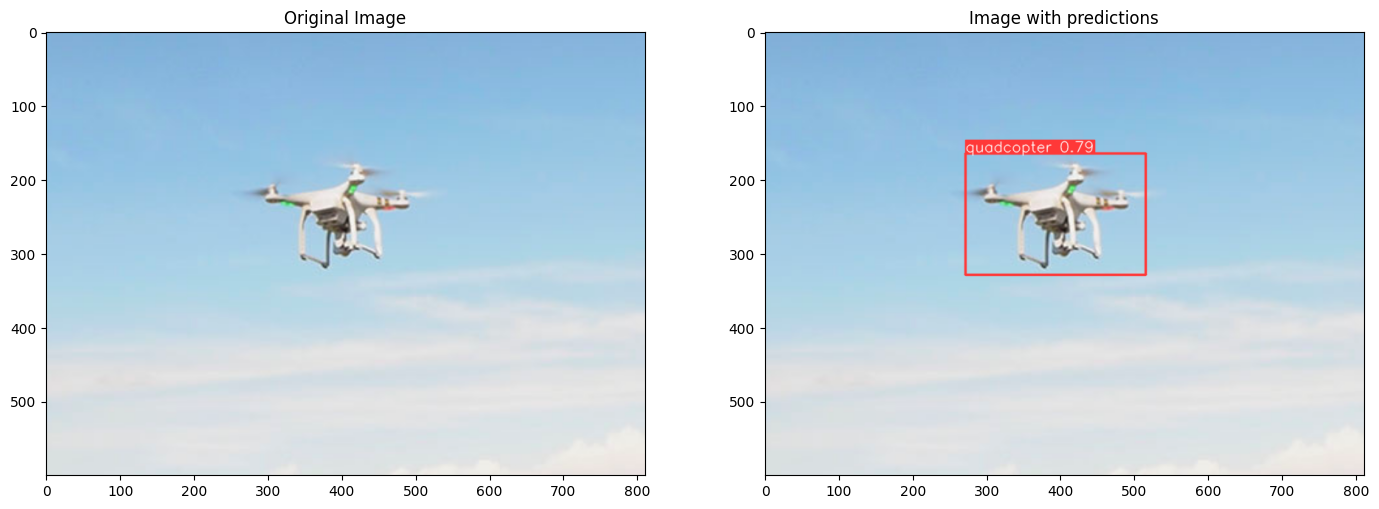

In [6]:
# ------------------------------------------------------------------------------
#              plot original image and the image with predictions, side by side.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load images
img1 = mpimg.imread(source_img)
img2 = im

# Plot side by side
plt.figure(figsize=(17, 7))

# Plot image1 on the left
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Original Image')

# Plot image2 on the right
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Image with predictions')

# Show the plot
plt.show()


In [7]:
# ------------------- get class, confidence and coordinates for each prediction.

print('A total of', results.__len__(), 'detections done.')
print()
print('Coordinates and classes for the bounding boxes:')

for j, r in enumerate(results[0]):
    print('detection  :', j)

    print('    class number:', int(r.boxes.cls.item()))
    print('    class name  :', r.names[r.boxes.cls.item()])

    print('    conf. level :', f"{r.boxes.conf.item():.2f}")

    print('    coordinates xyxy')
    xmin, ymin, xmax, ymax = r.boxes.xyxy[0]
    print('        xmin   :', int(0.5 + xmin.item()))
    print('        ymin   :', int(0.5 + ymin.item()))
    print('        xmax   :', int(0.5 + xmax.item()))
    print('        ymax   :', int(0.5 + ymax.item()))

    print('    coordinates xywh')
    xc, yc, wi, hi = r.boxes.xywh[0]
    print('        xc     :', int(0.5 + xc.item()))
    print('        yc     :', int(0.5 + yc.item()))
    print('        wi     :', int(0.5 + wi.item()))
    print('        hi     :', int(0.5 + hi.item()))

    print ()


A total of 1 detections done.

Coordinates and classes for the bounding boxes:
detection  : 0
    class number: 0
    class name  : quadcopter
    conf. level : 0.79
    coordinates xyxy
        xmin   : 272
        ymin   : 166
        xmax   : 515
        ymax   : 330
    coordinates xywh
        xc     : 393
        yc     : 248
        wi     : 244
        hi     : 164



In [ ]:
# From here it would be straightforward to make yolo labels (txt files)
# with the bounding boxes es detected by the yolo model.


## Step 4  - Evaluation and Analysis

Evaluate the performance of the trained models on the test set.

You can use metrics provided by ultralytics.

Compare the performance of models trained with varying epoch sizes.

Document your findings and analyze the impact of epoch size on model performance.

In [ ]:
# Step 4  - Evaluation and Analysis
#           Evaluate the performance of the trained models on the test set.
#           You can use metrics provided by ultralytics.
#           Compare the performance of models trained with varying epoch sizes.
#           Document your findings and analyze the impact of epoch size on model performance.

In [ ]:
# Confusion Matrix (for 3, 10 and 20 epochs)

#             Normalized         Standard
#3 epochs    0.94    1.00        818      88
#            0.06    0.00         50       0

#10 epochs   0.95    1.00        827      49
#            0.05    0.00         41       0

# 20 epochs  0.97    1.00        843      39
#            0.03    0.00         25       0

In [ ]:
# Labels graph

# This graph only depends on the dataset (not on the number of trainings or epochs)

# 1st quadrant in this case simply shows we have only one class (label),
# so 100% of objects are quadcopters.

# 2nd quadrant shows centered BB sizes,
# it look quite variated, with small bbs being dominant.

# 3rd quadrant shows xy bb position in frame,
# center is slightly dominant, and corners are almost empty.

# 4th quadrant shows BB size distribution,
# similar height and width, dominant again small bbs.


In [ ]:
# Labels correlogram

# This graph only depends on the dataset (not on the number of trainings or epochs)

# it is a more detailed visualization of the lables graph

#  as can be seen by xx coordinate (top) and yy coordinate (top),
#  it has a typical bell shape contour.

# as can be seen by width width (top) and height height (top),
# small bbs are dominant.

In [ ]:
# F1 curve (F1 vs Confidence)

# this curve plots F1 against Confidence


In [ ]:
# P curve (Precison vs Confidence)

# this curve plots Precision against Confidence

In [ ]:
# R curve (Recall vs Confidence)

# this curve plots Recall against Confidence

In [ ]:
# PR curve (Precision vs Recall)

# this curve plots Precision against Recall

Curves after 20 epochs


# Precision

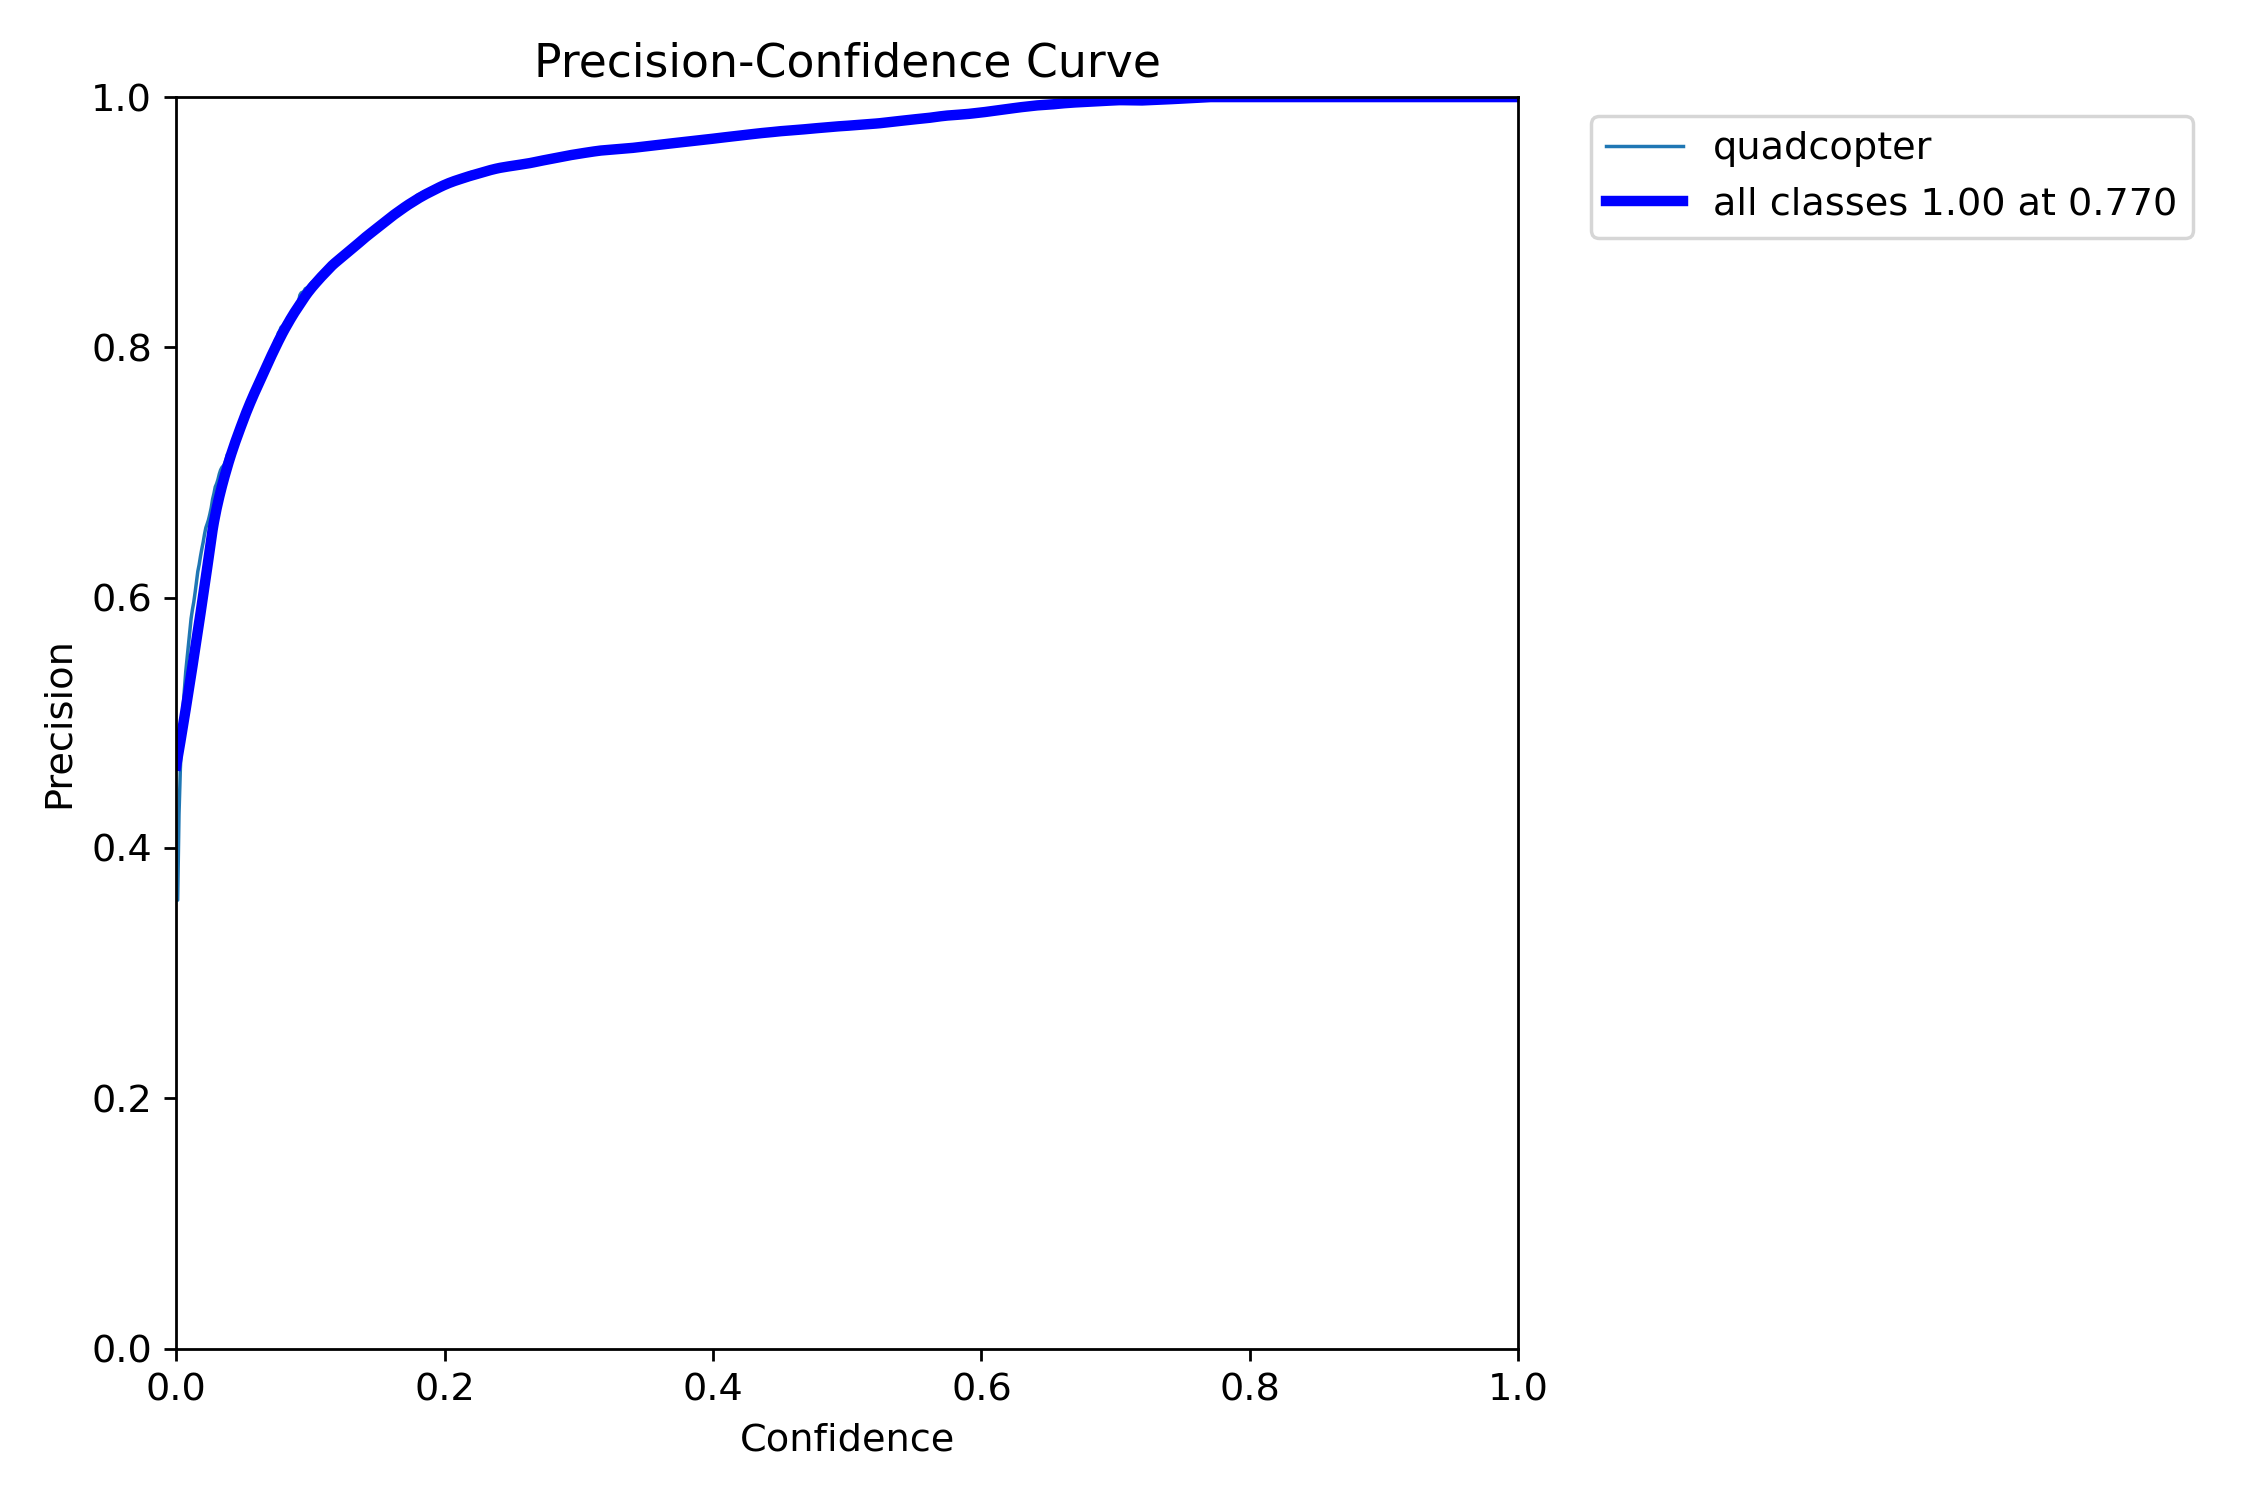

# Recall


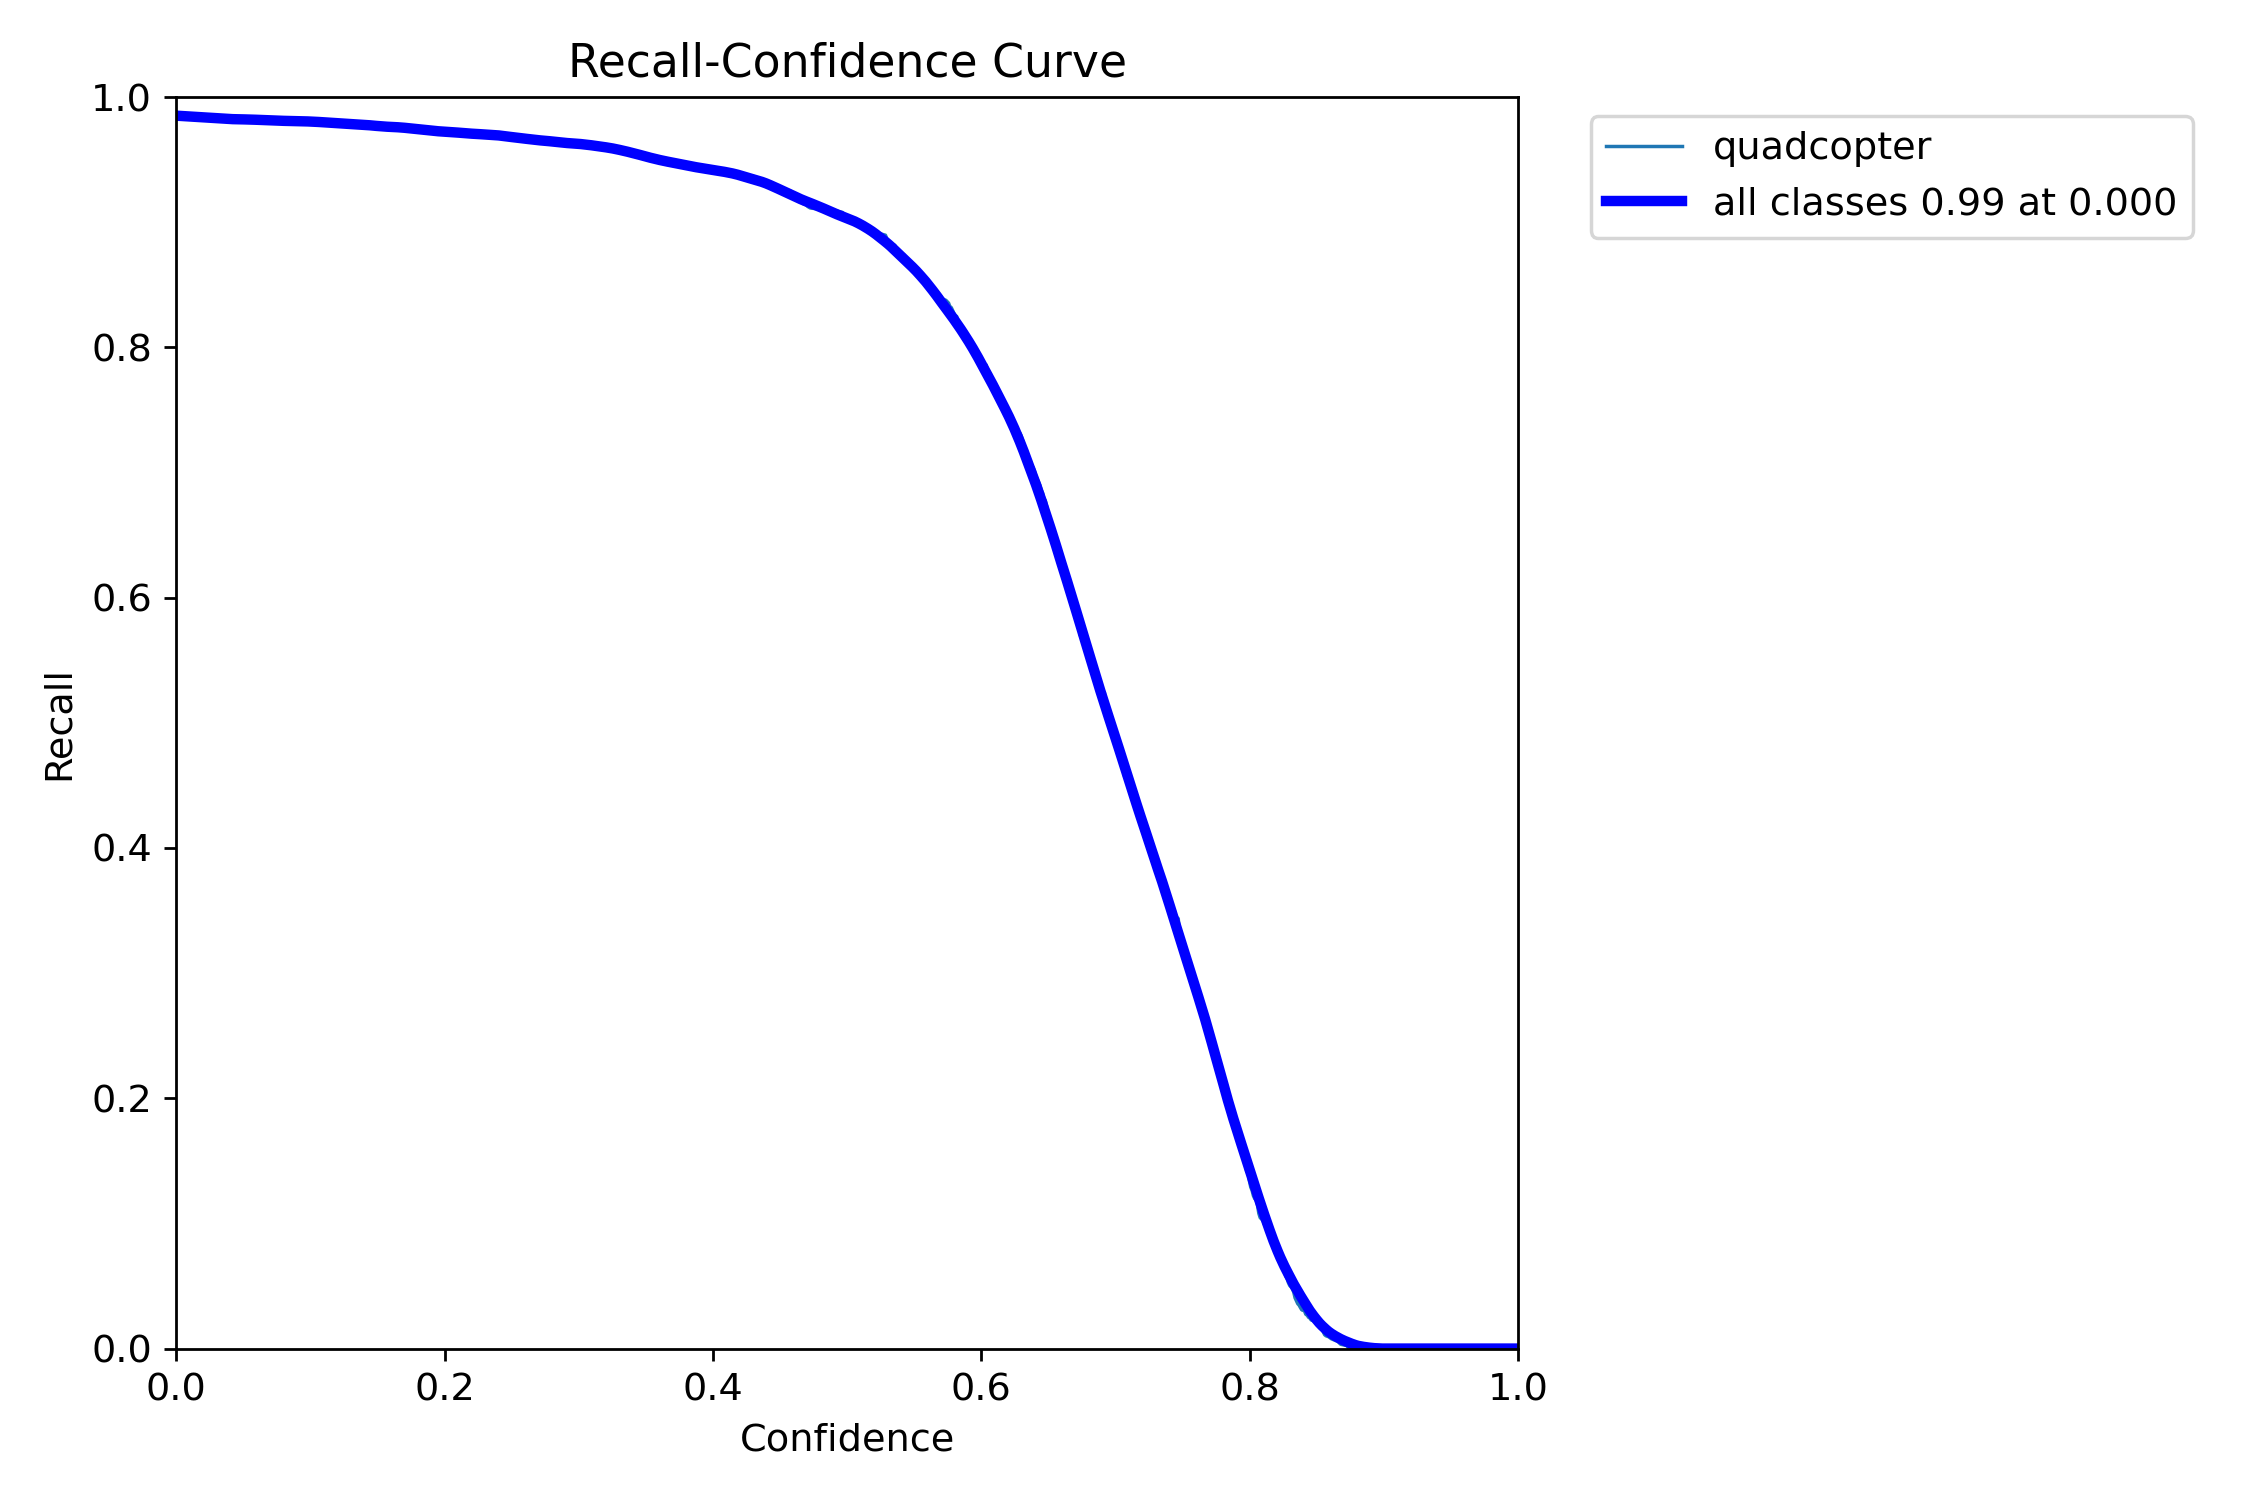


# Precision vs Recall

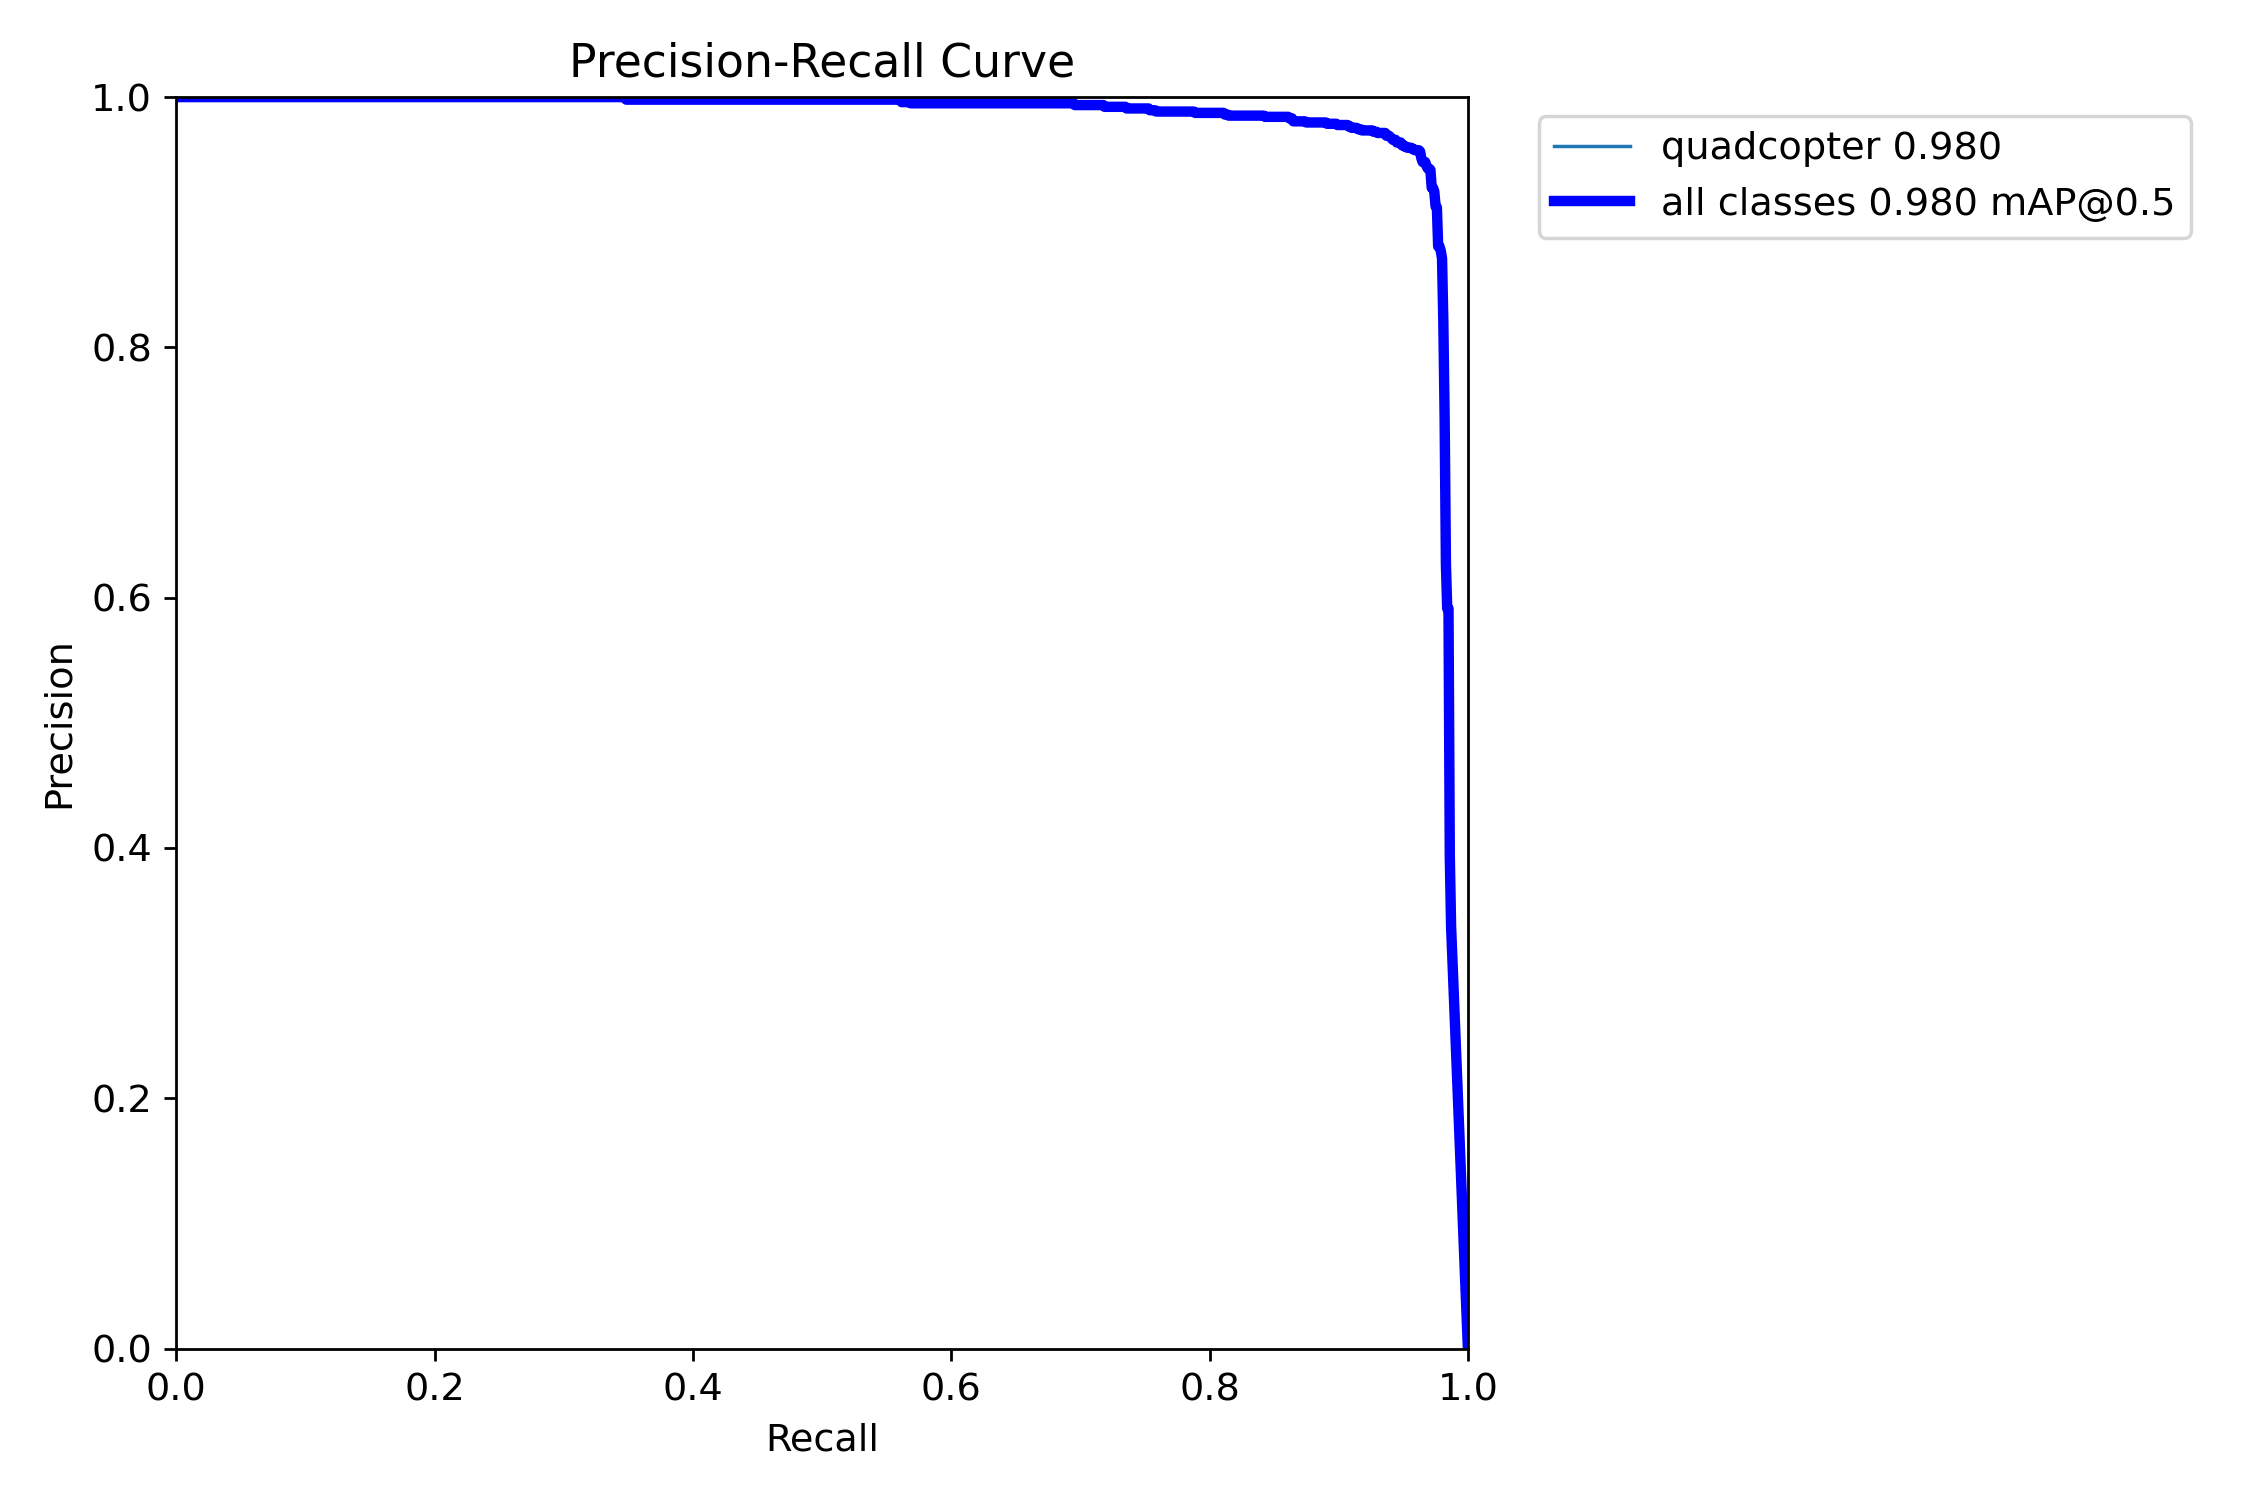


# results

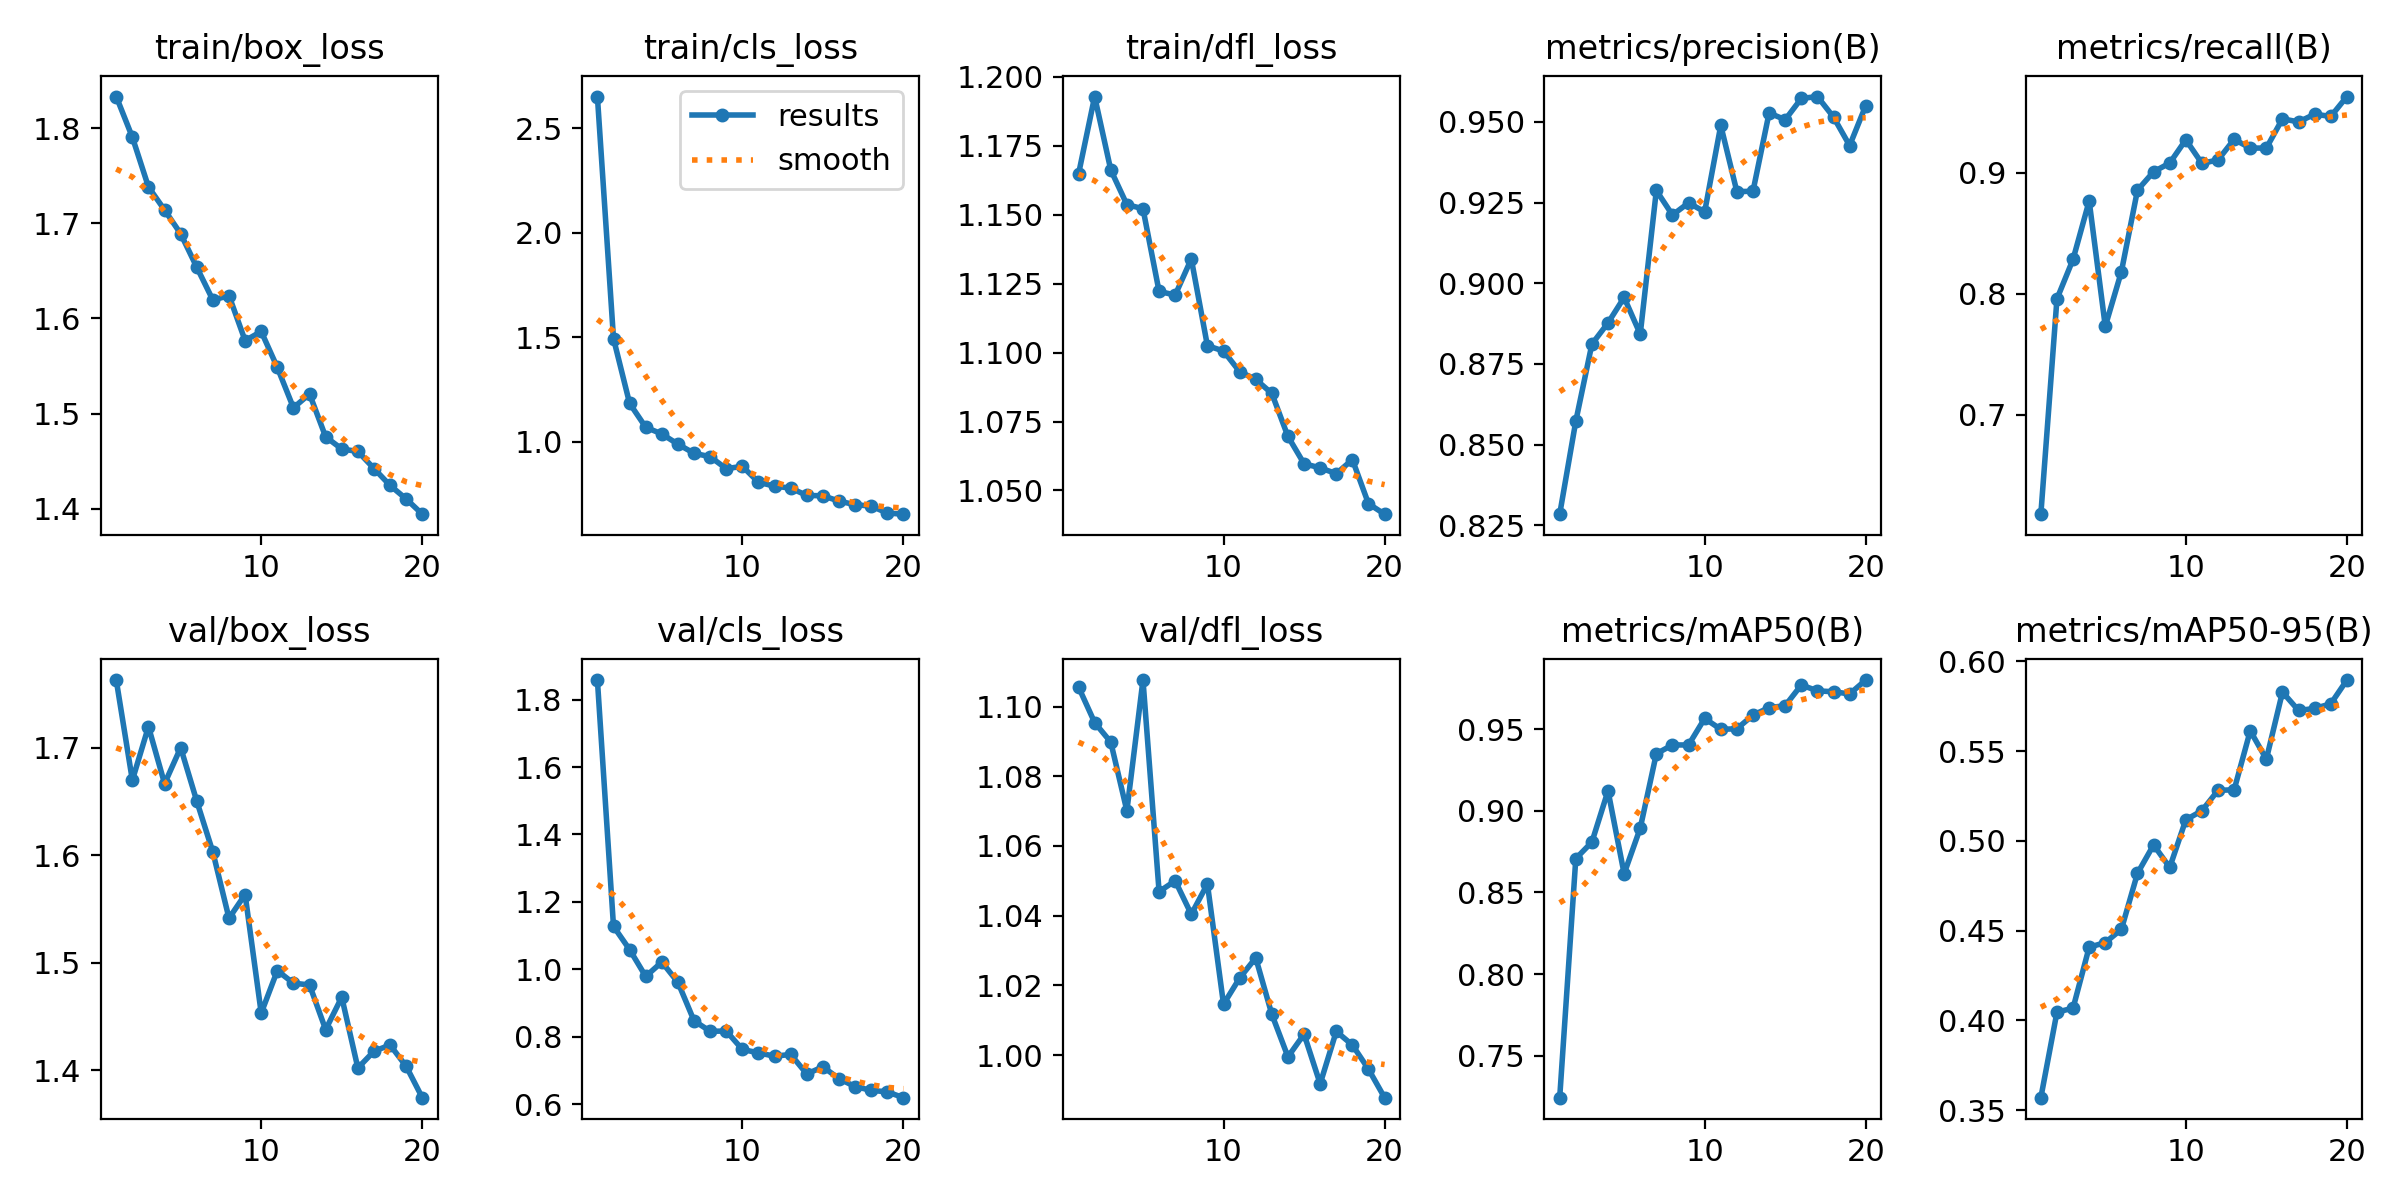